# eCommerce Behavior Data from Multi-Category Store

### Exploración y Preprocesamiento de Datos

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # loading libraries

In [ ]:
warnings.filterwarnings('ignore') # ignore warnings

In [ ]:
path = r'C:\Users\Aspph\Notebooks\2019-Nov\2019-Nov.csv' # file path
df = pd.read_csv(path) # read csv

In [ ]:
df.info() # print df schema

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [ ]:
df.head() # data preview

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [ ]:
df.tail() # data preview

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
67501974,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
67501975,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
67501976,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
67501977,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0
67501978,2019-11-30 23:59:59 UTC,view,1004233,2053013555631882655,electronics.smartphone,apple,1312.52,579969851,90aca71c-ed8a-4670-866a-761ebacb732d


In [ ]:
df.shape # no. of observations; no. of columns

(67501979, 9)

In [ ]:
df.keys() # column names

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [ ]:
df['event_type'].unique() # values for event type col

array(['view', 'cart', 'purchase'], dtype=object)

In [ ]:
df.isna().sum() # check for null values

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [ ]:
updated_df = df.dropna() # drop rows w/null values
updated_df.shape

(42089564, 9)

In [ ]:
updated_df.isna().sum() # check for null values

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [ ]:
updated_df['event_time'] = pd.to_datetime(updated_df['event_time']) # convert event time col to datetime

In [ ]:
updated_df.info() # print df schema

<class 'pandas.core.frame.DataFrame'>
Index: 42089564 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 3.1+ GB


In [ ]:
updated_df.loc[:, 'purchase'] = [1 if event == 'purchase' else 0 for event in updated_df['event_type']] # binary column to track purchases

In [ ]:
updated_df.head() # data preview

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchase
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,0


In [ ]:
updated_df.loc[:, 'day'] = updated_df.event_time.dt.strftime('%d')
updated_df.loc[:, 'hour'] = updated_df.event_time.dt.strftime('%H') # extract both day and hour from event time column
updated_df.head() # data preview

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchase,day,hour
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,01,00
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,01,00
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,01,00
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,01,00
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,0,01,00


In [ ]:
updated_df.shape # no. of observations; no. of columns

(42089564, 12)

In [ ]:
updated_df.keys() # column names

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'purchase', 'day', 'hour'],
      dtype='object')

## Análisis y Visualización

### Cúal es la tasa de conversión general?

In [ ]:
no_purchases = updated_df['purchase'].sum() # total no. of purchases
no_purchases

659256

In [ ]:
views = updated_df[updated_df['event_type'] == 'view'] # filter df by event type (views)
no_views = views.shape[0] # total no. of views
no_views

39315226

In [ ]:
print("Tasa de conversión general: {:.2f}".format(no_purchases/no_views))

Tasa de conversión general: 0.02


#### En qué horas del día se concentra la mayoría de las compras?

In [ ]:
purchases = updated_df[updated_df['event_type'] == 'purchase'] # filter df by event type (purchases)
purchases.head() # data preview

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchase,day,hour
168,2019-11-01 00:01:04+00:00,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d,1,01,00
707,2019-11-01 00:04:51+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d,1,01,00
939,2019-11-01 00:06:33+00:00,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e,1,01,00
942,2019-11-01 00:06:34+00:00,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47,1,01,00
1107,2019-11-01 00:07:38+00:00,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1,1,01,00


In [ ]:
purchases.info() # print df schema

<class 'pandas.core.frame.DataFrame'>
Index: 659256 entries, 168 to 67501863
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     659256 non-null  datetime64[ns, UTC]
 1   event_type     659256 non-null  object             
 2   product_id     659256 non-null  int64              
 3   category_id    659256 non-null  int64              
 4   category_code  659256 non-null  object             
 5   brand          659256 non-null  object             
 6   price          659256 non-null  float64            
 7   user_id        659256 non-null  int64              
 8   user_session   659256 non-null  object             
 9   purchase       659256 non-null  int64              
 10  day            659256 non-null  object             
 11  hour           659256 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(6)
memory usage: 65.4+ MB


In [ ]:
purchases_per_hour = purchases['hour'].value_counts().sort_index() # count purchases per hour and sort index
purchases_per_hour

hour
00     1990
01     2879
02     7349
03    17890
04    30681
05    37588
06    40919
07    41912
08    47309
09    52140
10    50496
11    47219
12    44971
13    43776
14    43248
15    37595
16    32714
17    31533
18    16994
19    12406
20     7497
21     4747
22     3312
23     2091
Name: count, dtype: int64

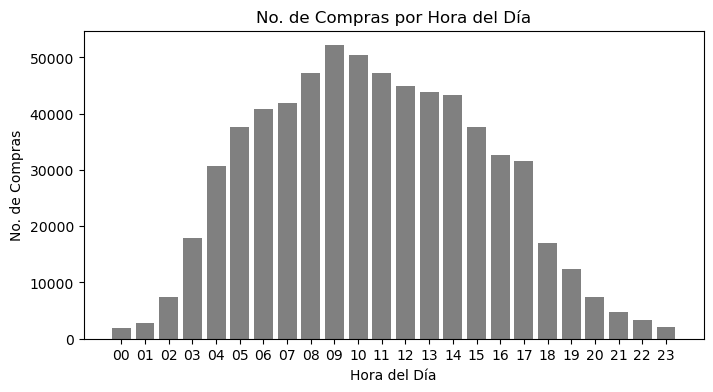

In [ ]:
plt.figure(figsize = (8, 4)) # figure size
plt.bar(purchases_per_hour.index, purchases_per_hour.values, color = 'grey') # plt bar plot
plt.title('No. de Compras por Hora del Día') # plot title
plt.xlabel('Hora del Día') # x-label
plt.ylabel('No. de Compras') # y-label
plt.grid(False) # no grid
plt.show()

#### Qué catagorías tienen mayor conversión?

In [ ]:
views = updated_df[updated_df['event_type'] == 'view'] # filter df by event type (views)
views = views.groupby('category_code').size() # return the number of elements in each category
views.head()

category_code
accessories.bag         258200
accessories.umbrella      4890
accessories.wallet       66862
apparel.belt              1856
apparel.costume          79601
dtype: int64

In [ ]:
purchases = updated_df[updated_df['event_type'] == 'purchase'] # filter df by event type (purchase)
purchases = purchases.groupby('category_code').size() # return the number of elements in each category
purchases.head()

category_code
accessories.bag         1494
accessories.umbrella      26
accessories.wallet       366
apparel.belt              31
apparel.costume          215
dtype: int64

In [ ]:
views.shape, purchases.shape # no. of observations for both dfs

((129,), (126,))

**Nota**: La dimensión difiere entre ambos dataframes, algunas categorías pueden no tener compras registradas.

In [ ]:
categories = pd.concat([views, purchases], axis = 1).fillna(0) # concatenate both dfs
categories = categories.rename(columns = {0: 'views', 1: 'purchases'}) # rename columns
categories.head()

,views,purchases
category_code,,
accessories.bag,258200,1494.0
accessories.umbrella,4890,26.0
accessories.wallet,66862,366.0
apparel.belt,1856,31.0
apparel.costume,79601,215.0


In [ ]:
categories['conversion_rate'] = categories['purchases'] / categories['views'] # calculate conversion rate for each category
categories = categories.sort_values('conversion_rate', ascending = False) # sort df by conversion rate
categories.head(10) # top 10 categories sorted by conversion rate

,views,purchases,conversion_rate
category_code,,,
kids.fmcg.diapers,26441,779.0,0.029462
electronics.smartphone,14811764,382492.0,0.025824
electronics.audio.headphone,1632332,40742.0,0.024959
appliances.kitchen.microwave,269589,4962.0,0.018406
appliances.personal.scales,88110,1576.0,0.017887
appliances.environment.water_heater,185364,3275.0,0.017668
medicine.tools.tonometer,20150,344.0,0.017072
apparel.belt,1856,31.0,0.016703
appliances.iron,278414,4648.0,0.016695


#### Cuántos usuarios añaden productos al carrito pero no compran? Qué porcentaje representan?

In [ ]:
updated_df.head() # data preview

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,purchase,day,hour
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,01,00
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,01,00
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,01,00
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,01,00
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,0,01,00


In [ ]:
cart = updated_df[updated_df['event_type'] == 'cart'] # filter df by event type (cart)
cart.shape

(2115082, 12)

In [ ]:
purchases = updated_df[updated_df['event_type'] == 'purchase'] # filter df by event type (purchase)
purchases.shape

(659256, 12)

In [ ]:
no_purchase = cart.shape[0] - purchases.shape[0] # no. of users who didn't buy the item
no_purchase

1455826

In [ ]:
print("Un total de {} usuarios añadieron articulos al carrito pero no compraron, los cuales representan el {:.2f}%".format(no_purchase, (no_purchase / cart.shape[0]) * 100))

Un total de 1455826 usuarios añadieron articulos al carrito pero no compraron, los cuales representan el 68.83%


#### Qué categorías presentan más abandono del carrito?

In [ ]:
cart = updated_df[updated_df['event_type'] == 'cart'] # filter df by event type (cart)
cart = cart.groupby('category_code').size().rename('cart_count') # return the number of elements in each category
cart.head()

category_code
accessories.bag         5310
accessories.umbrella      73
accessories.wallet      1112
apparel.belt              68
apparel.costume          695
Name: cart_count, dtype: int64

In [ ]:
purchases = updated_df[updated_df['event_type'] == 'purchase'] # filter df by event type (purchase)
purchases = purchases.groupby('category_code').size().rename('purchases_count') # return the number of elements in each category
purchases.head()

category_code
accessories.bag         1494
accessories.umbrella      26
accessories.wallet       366
apparel.belt              31
apparel.costume          215
Name: purchases_count, dtype: int64

In [ ]:
views.shape, purchases.shape # no. of observations for both dfs

((129,), (126,))

In [ ]:
cart_purchases = pd.concat([cart, purchases], axis = 1).fillna(0) # concatenate both dfs
cart_purchases = cart_purchases.rename(columns = {0: 'cart_count', 1: 'purchases_count'}) # rename columns
cart_purchases.head()

,cart_count,purchases_count
category_code,,
accessories.bag,5310,1494.0
accessories.umbrella,73,26.0
accessories.wallet,1112,366.0
apparel.belt,68,31.0
apparel.costume,695,215.0


In [ ]:
cart_purchases['no_purchase'] = cart_purchases['cart_count'] - cart_purchases['purchases_count'] # no. of users who didn't buy the item by category
cart_purchases = cart_purchases.sort_values('no_purchase', ascending = False) # order by no purchase column
cart_purchases.head(10)

,cart_count,purchases_count,no_purchase
category_code,,,
electronics.smartphone,1159323,382492.0,776831.0
electronics.audio.headphone,130819,40742.0,90077.0
electronics.video.tv,105931,30178.0,75753.0
appliances.kitchen.washer,69911,19680.0,50231.0
appliances.environment.vacuum,64592,18122.0,46470.0
electronics.clocks,63678,21426.0,42252.0
computers.notebook,58831,18323.0,40508.0
appliances.kitchen.refrigerators,40708,10420.0,30288.0
apparel.shoes,34251,8768.0,25483.0


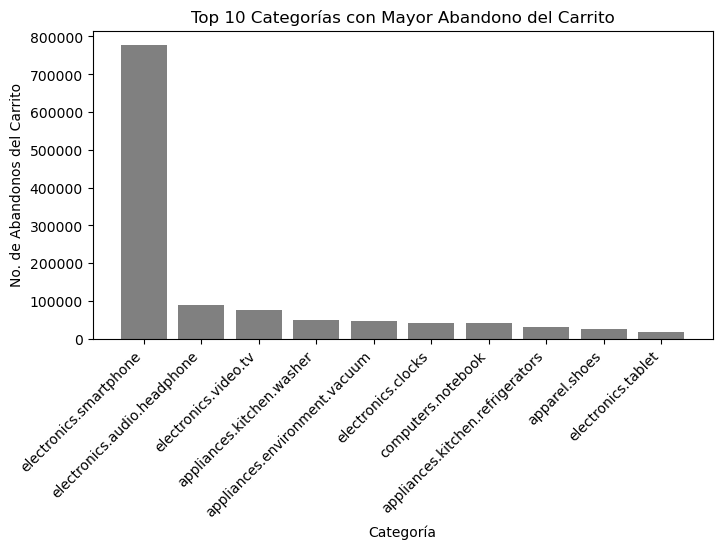

In [ ]:
plt.figure(figsize = (8, 4))
plt.bar(cart_purchases.head(10).index, cart_purchases.head(10)['no_purchase'], color = 'grey')
plt.title('Top 10 Categorías con Mayor Abandono del Carrito')
plt.xlabel('Categoría')
plt.ylabel('No. de Abandonos del Carrito')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


### Pensamiento Análitico y Recomendaciones

#### Insights de Comportamiento

- Un gran porcentaje de las compras se registra entre las 5:00 y las 15:00 horas, siendo las 9:00 la hora con un mayor registro de actividad.
- La categoría `electronics.smartphone` representa la segunda categoría con una mayor tasa de conversión, sin embargo también representa la categoría con un mayor número de registros de abandono del carrito.

#### Recomendación de Marketing

- Dado que `electronics.smartphone` es la categoría con mayor tasa de conversión y mayor abandono del carrito, es necesario implementar campañas de marketing para usuarios interesados en dicha categoría, ofreciendo descuentos adicionales o simplemente recordatorios cada cierto tiempo.

#### Segmentación de Usuarios

- El horario de actividad podría ser útil para segmentar usuarios, se podrían identificar tendencias en los grupos y así personalizar las campañas de marketing para aumentar las compras y reducir la tasa de abandono del carrito.

***

Diego Godinez Bravo\
Junio 2025